In [1]:
#importing all required liabraries


import numpy as np
import pandas as pd
import datetime as dt

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#pre-processing tools
from scipy import stats
from sklearn.utils import resample
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from scipy.stats import zscore


#Classifiers
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso,Ridge,LassoCV,RidgeCV


#ensemblib techniques,A
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC,SVR


#Evolution etrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import StratifiedKFold,cross_val_score



#feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest,f_classif

#Cross validation
from sklearn.model_selection import GridSearchCV

#warnings
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#import data
df1= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

In [3]:
df=df1.copy()

In [4]:
df.head(5)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [5]:
#checking shape of data set
df.shape

(7752, 25)

In [6]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [7]:
#check the null values in columns
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [8]:
#modify the date column
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [9]:
df=df.drop(columns =['Date'])

In [10]:
for i in df.columns:
    print(i,df[i].nunique())

station 25
Present_Tmax 167
Present_Tmin 155
LDAPS_RHmin 7672
LDAPS_RHmax 7664
LDAPS_Tmax_lapse 7675
LDAPS_Tmin_lapse 7675
LDAPS_WS 7675
LDAPS_LH 7675
LDAPS_CC1 7569
LDAPS_CC2 7582
LDAPS_CC3 7599
LDAPS_CC4 7524
LDAPS_PPT1 2812
LDAPS_PPT2 2510
LDAPS_PPT3 2356
LDAPS_PPT4 1918
lat 12
lon 25
DEM 25
Slope 27
Solar radiation 1575
Next_Tmax 183
Next_Tmin 157
Day 21
Month 12
Year 5


In [11]:
#check the null values in columns
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Day                  2
Month                2
Year                 2
dtype: int64

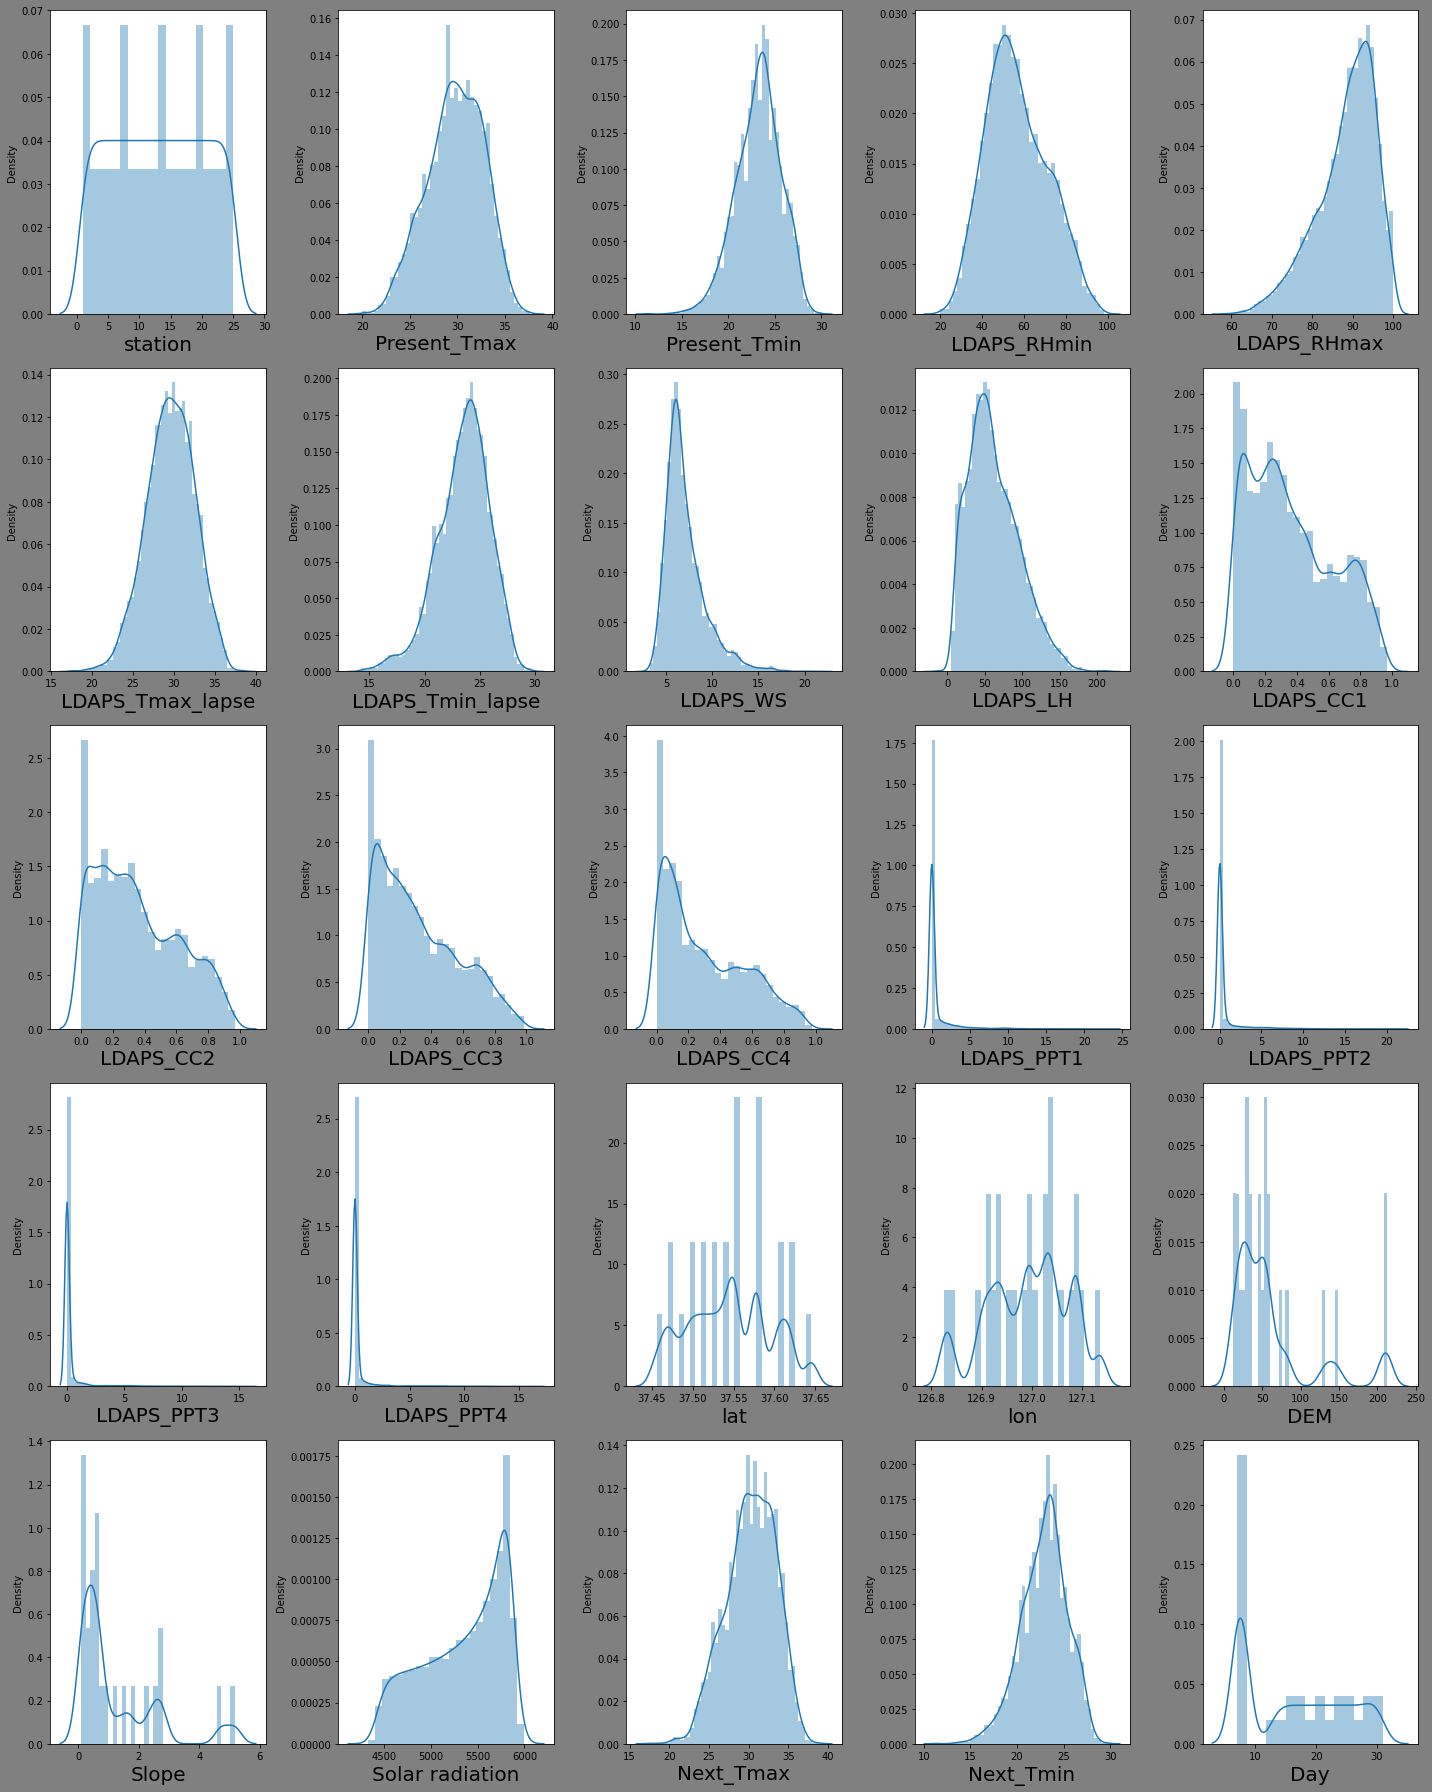

In [12]:
#let see how data is distribute in every column 

plt.figure(figsize=(20,25),facecolor="grey")
plotnumber=1

for column in df:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Handaling Null Values

Visualize the data distribution in  column and fill the null values
If data is distributed normally then we replace null values with mean else with median.

In [13]:
#Replacing the null value by using column mean .bcz data is normally distributed
df['Present_Tmax'].fillna(df['Present_Tmax'].mean(),inplace=True)
print(df['Present_Tmax'].isnull().sum())

0


In [14]:
#Replacing the null value by using column mean .bcz data is normally distributed
df['Present_Tmin'].fillna(df['Present_Tmin'].mean(),inplace=True)

#Replacing the null value by using column mean .bcz data is normally distributed
df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean(),inplace=True)

#Replacing the null value by using column median .bcz data isn't normally distributed
df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].median(),inplace=True)

#Replacing the null value by using column mean .bcz data is normally distributed
df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean(),inplace=True)

#Replacing the null value by using column mean .bcz data is normally distributed
df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean(),inplace=True)

#Replacing the null value by using column mean .bcz data is normally distributed
df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean(),inplace=True)

#Replacing the null value by using column mean .bcz data is normally distributed
df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean(),inplace=True)

#Replacing the null value by using column mean .bcz data is normally distributed
df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean(),inplace=True)

#Replacing the null value by using column mean .bcz data is normally distributed
df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean(),inplace=True)

#Replacing the null value by using column median .bcz data isn't normally distributed
df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].median(),inplace=True)

#Replacing the null value by using column median .bcz data isn't normally distributed
df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].median(),inplace=True)

#Replacing the null value by using column mean .bcz data is normally distributed
df['Next_Tmax'].fillna(df['Next_Tmax'].mean(),inplace=True)

#Replacing the null value by using column mean .bcz data is normally distributed
df['Next_Tmin'].fillna(df['Next_Tmin'].mean(),inplace=True)


#Replacing the null value by its mode and its 1st value .bcz this are categorical variable.
df['Day'].fillna(df['Day'].mode()[0],inplace=True)
df['Month'].fillna(df['Month'].mode()[0],inplace=True)
df['Year'].fillna(df['Year'].mode()[0],inplace=True)
df['station'].fillna(df['station'].mode()[0],inplace=True)

In [15]:
df['LDAPS_PPT1'].value_counts()

0.000000    4844
0.001953      11
0.002604       5
0.001734       3
0.000048       2
            ... 
0.298803       1
0.330680       1
0.330527       1
0.302974       1
2.040502       1
Name: LDAPS_PPT1, Length: 2812, dtype: int64

There is 62.48% data is 0's LDAPS_PPT1

In [16]:
df['LDAPS_PPT2'].value_counts()

0.000000     5151
0.001953        7
0.000040        3
0.000781        3
21.621661       2
             ... 
0.012846        1
0.020298        1
0.003971        1
0.009729        1
0.247997        1
Name: LDAPS_PPT2, Length: 2510, dtype: int64

There is 66.44% data is 0's in LDAPS_PPT2

In [17]:
df['LDAPS_PPT3'].value_counts()

0.000000    5294
0.001953      10
0.000852       4
0.002604       3
0.000038       2
            ... 
0.009490       1
0.005241       1
0.114325       1
0.007045       1
0.021030       1
Name: LDAPS_PPT3, Length: 2356, dtype: int64

There is 68.29% data is 0's in LDAPS_PPT3

In [18]:
df['LDAPS_PPT4'].value_counts()

0.000000     5751
0.001953        3
16.655469       2
0.001065        2
0.001105        2
             ... 
5.862256        1
4.265625        1
0.009690        1
0.005128        1
3.093815        1
Name: LDAPS_PPT4, Length: 1918, dtype: int64

There is 74.18% data is 0's in LDAPS_PPT4

In [19]:
#All above mention columns have null vbalue >50% of its actual counts .So dropping that columns.
df = df.drop(columns = ['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4'])

In [20]:
print(df.isnull().sum())

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
Year                0
dtype: int64


Null values are removed from columns

In [21]:
df.shape

(7752, 23)

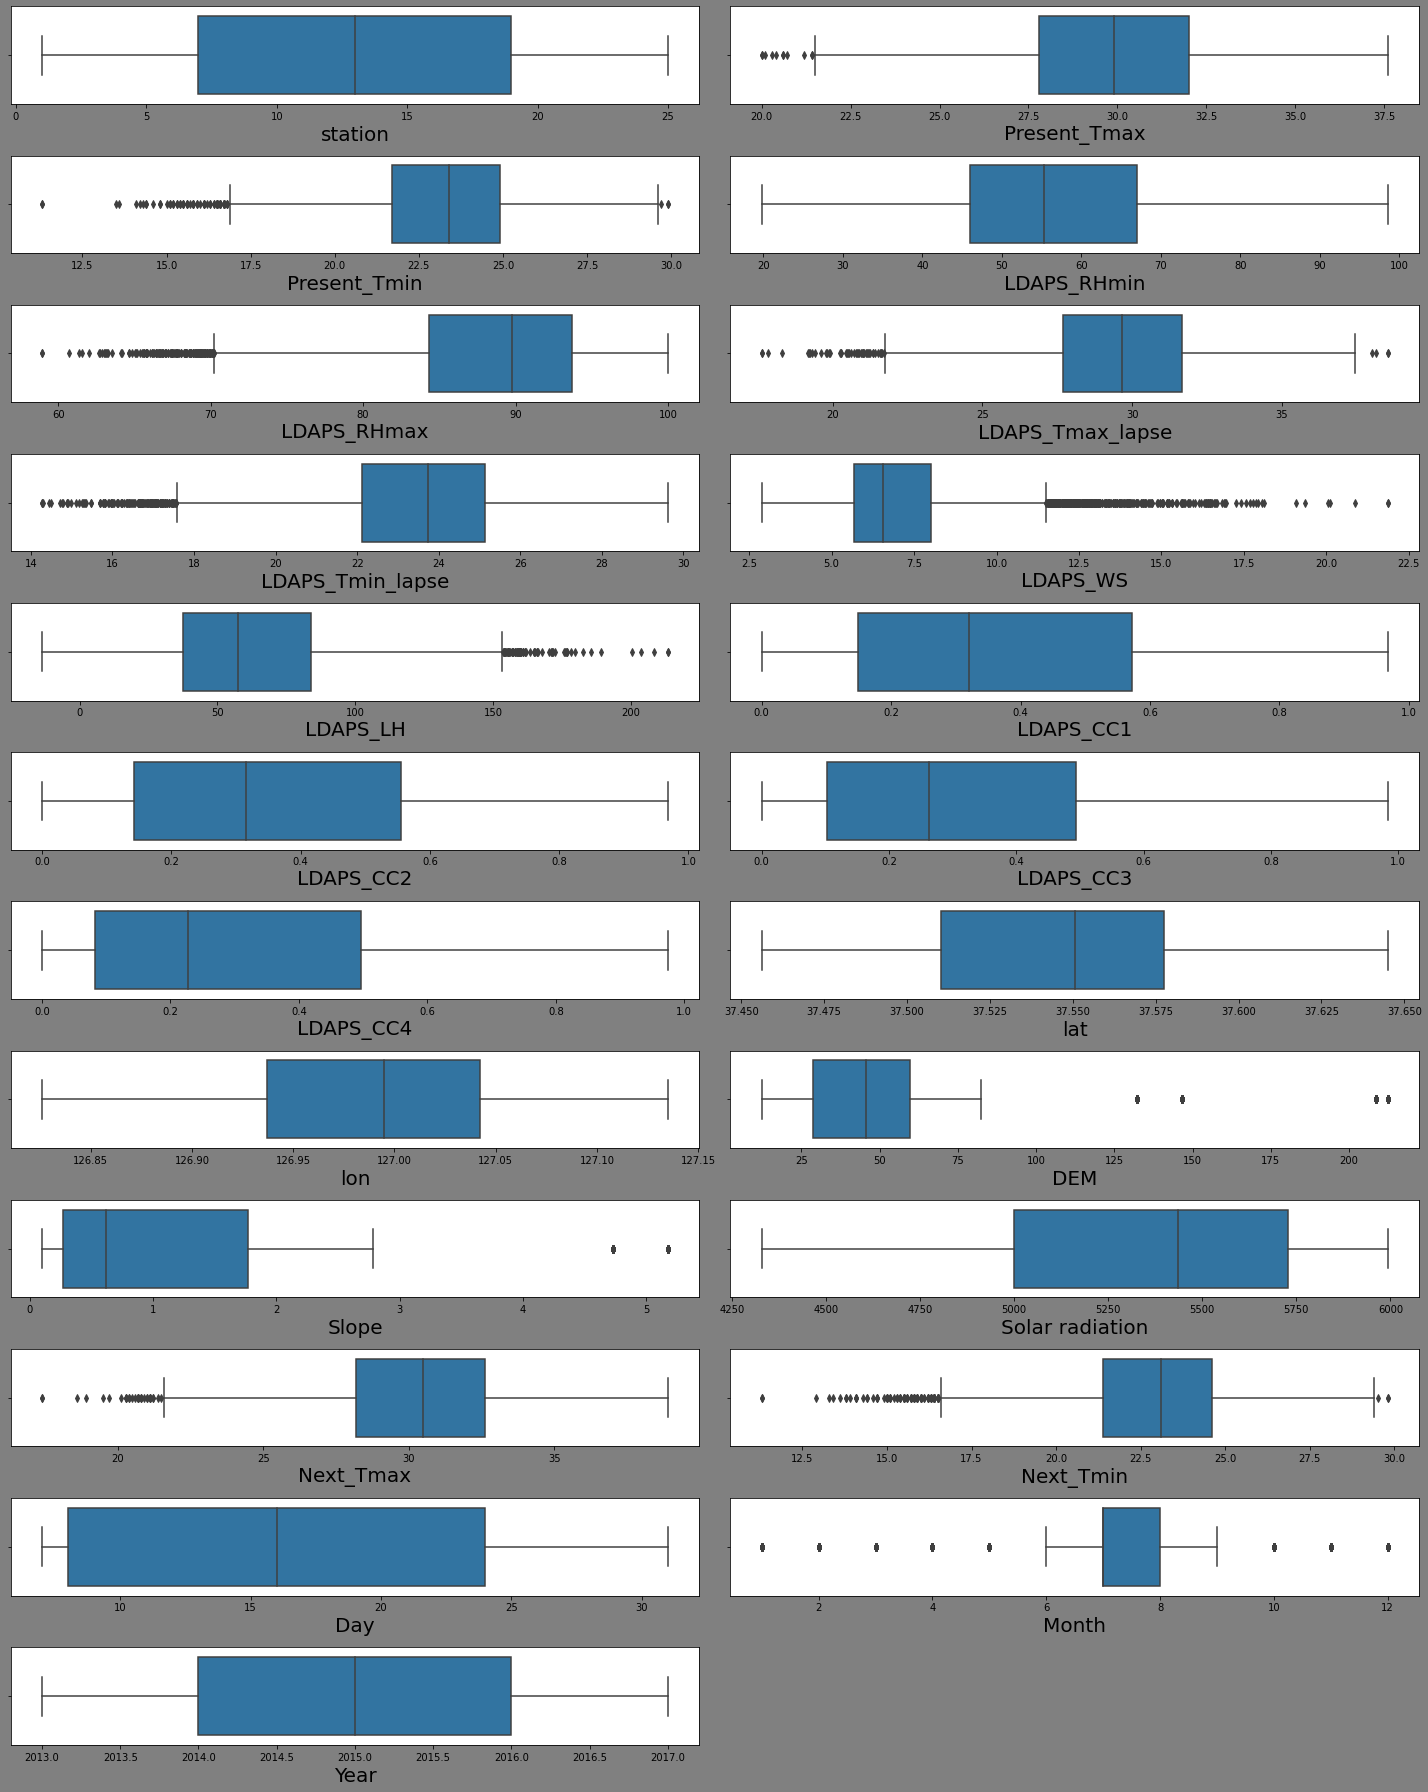

In [22]:
#Checking the skewness in columns
#let see how data is distribute in every column

plt.figure(figsize=(20,25),facecolor="grey")
plotnumber=1

for column in df:
    if plotnumber<=23:
        ax=plt.subplot(12,2,plotnumber)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#Outliers are there in columns

In [23]:
df.skew()

station             0.000100
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
Day                 0.245892
Month              -0.705303
Year                0.000365
dtype: float64

In [24]:
#Remove the outliers by using Box-Cox method

df['LDAPS_WS'] = stats.boxcox(df['LDAPS_WS'])[0]
df['DEM'] = stats.boxcox(df['DEM'])[0]
df['Slope'] = stats.boxcox(df['Slope'])[0]

In [25]:
df.skew()

station             0.000100
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS           -0.002570
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
lat                 0.087062
lon                -0.285213
DEM                 0.035167
Slope               0.011081
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
Day                 0.245892
Month              -0.705303
Year                0.000365
dtype: float64

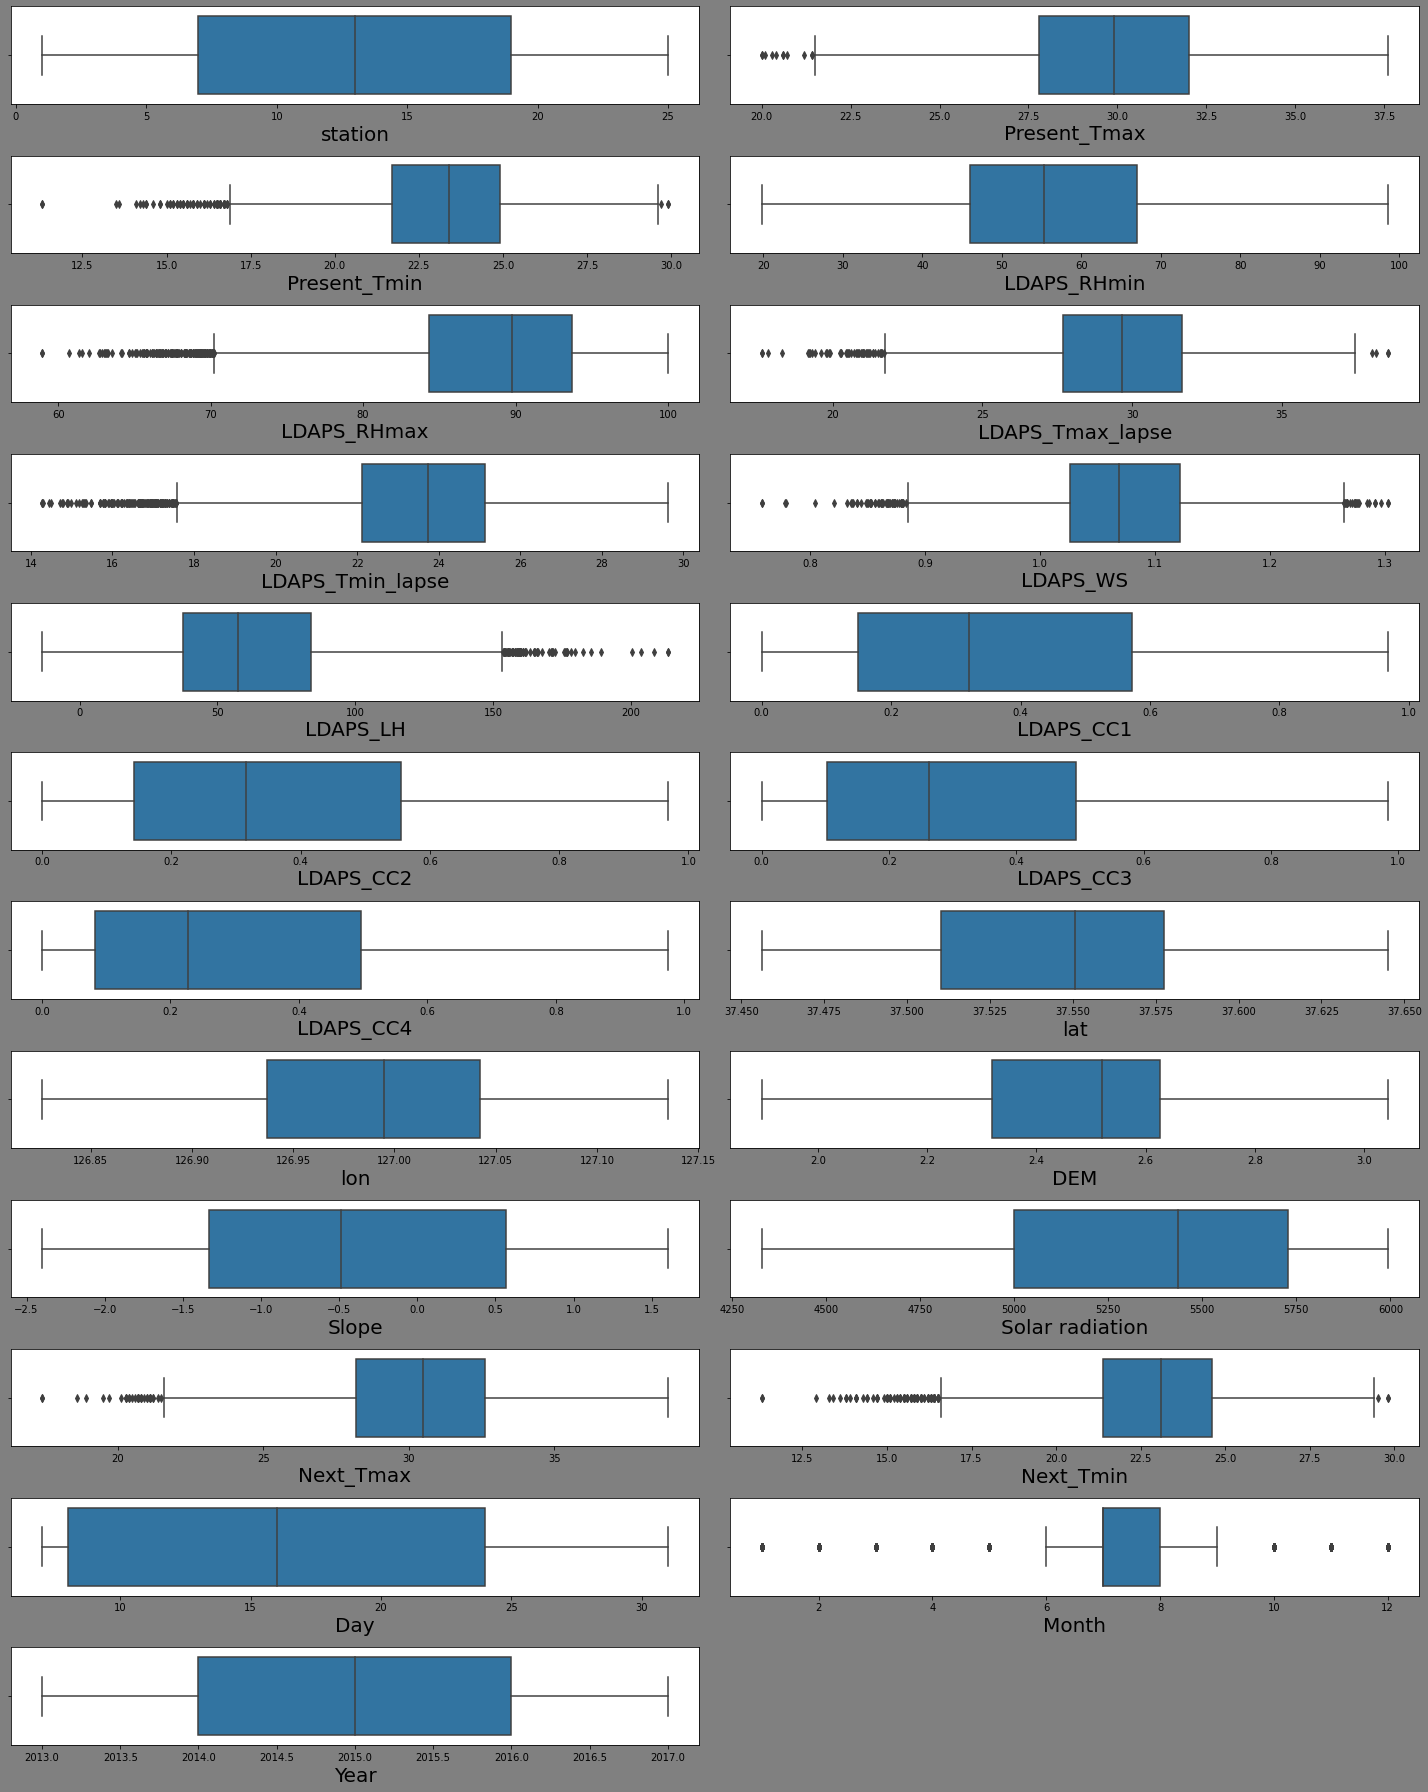

In [26]:
#Checking the skewness removed or not from columns

plt.figure(figsize=(20,25),facecolor="grey")
plotnumber=1

for column in df:
    if plotnumber<=23:
        ax=plt.subplot(12,2,plotnumber)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### Remove outlier by using Z_ Score 

In [27]:
#Removing outliers from contenious variable
from scipy.stats import zscore
z=np.abs(zscore(df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH']]))
df_Z_new = (z<3).all(axis = 1)
new_df=df[df_Z_new]

In [28]:
print("shape Before and after")
print("shape before".ljust(20),":",df.shape)
print("shape after".ljust(20),":",new_df.shape)
print("Precentage of data loss".ljust(20),":",(100-((new_df.shape[0]/df.shape[0])*100)),"%")

shape Before and after
shape before         : (7752, 23)
shape after          : (7562, 23)
Precentage of data loss : 2.4509803921568647 %


#### IQR

In [29]:
#We'll find the IQR to identify outlier

#1st quantile
q1 = df.quantile(0.25)

#3rd quantile
q3 = df.quantile(0.75)

#IQR
iqr = q3 - q1

In [30]:
#Removing Outlier Using IQR Method
df_I_new = df[~((df < (q1 - 1.5 * iqr)) |(df > (q3 + 1.5 * iqr))).any(axis=1)]

In [31]:
print("shape Before and after")
print("shape before".ljust(20),":",df.shape)
print("shape after".ljust(20),":",df_I_new.shape)
print("Precentage of data loss".ljust(20),":",(100-((df_I_new.shape[0]/df.shape[0])*100)),"%")

shape Before and after
shape before         : (7752, 23)
shape after          : (5350, 23)
Precentage of data loss : 30.985552115583076 %


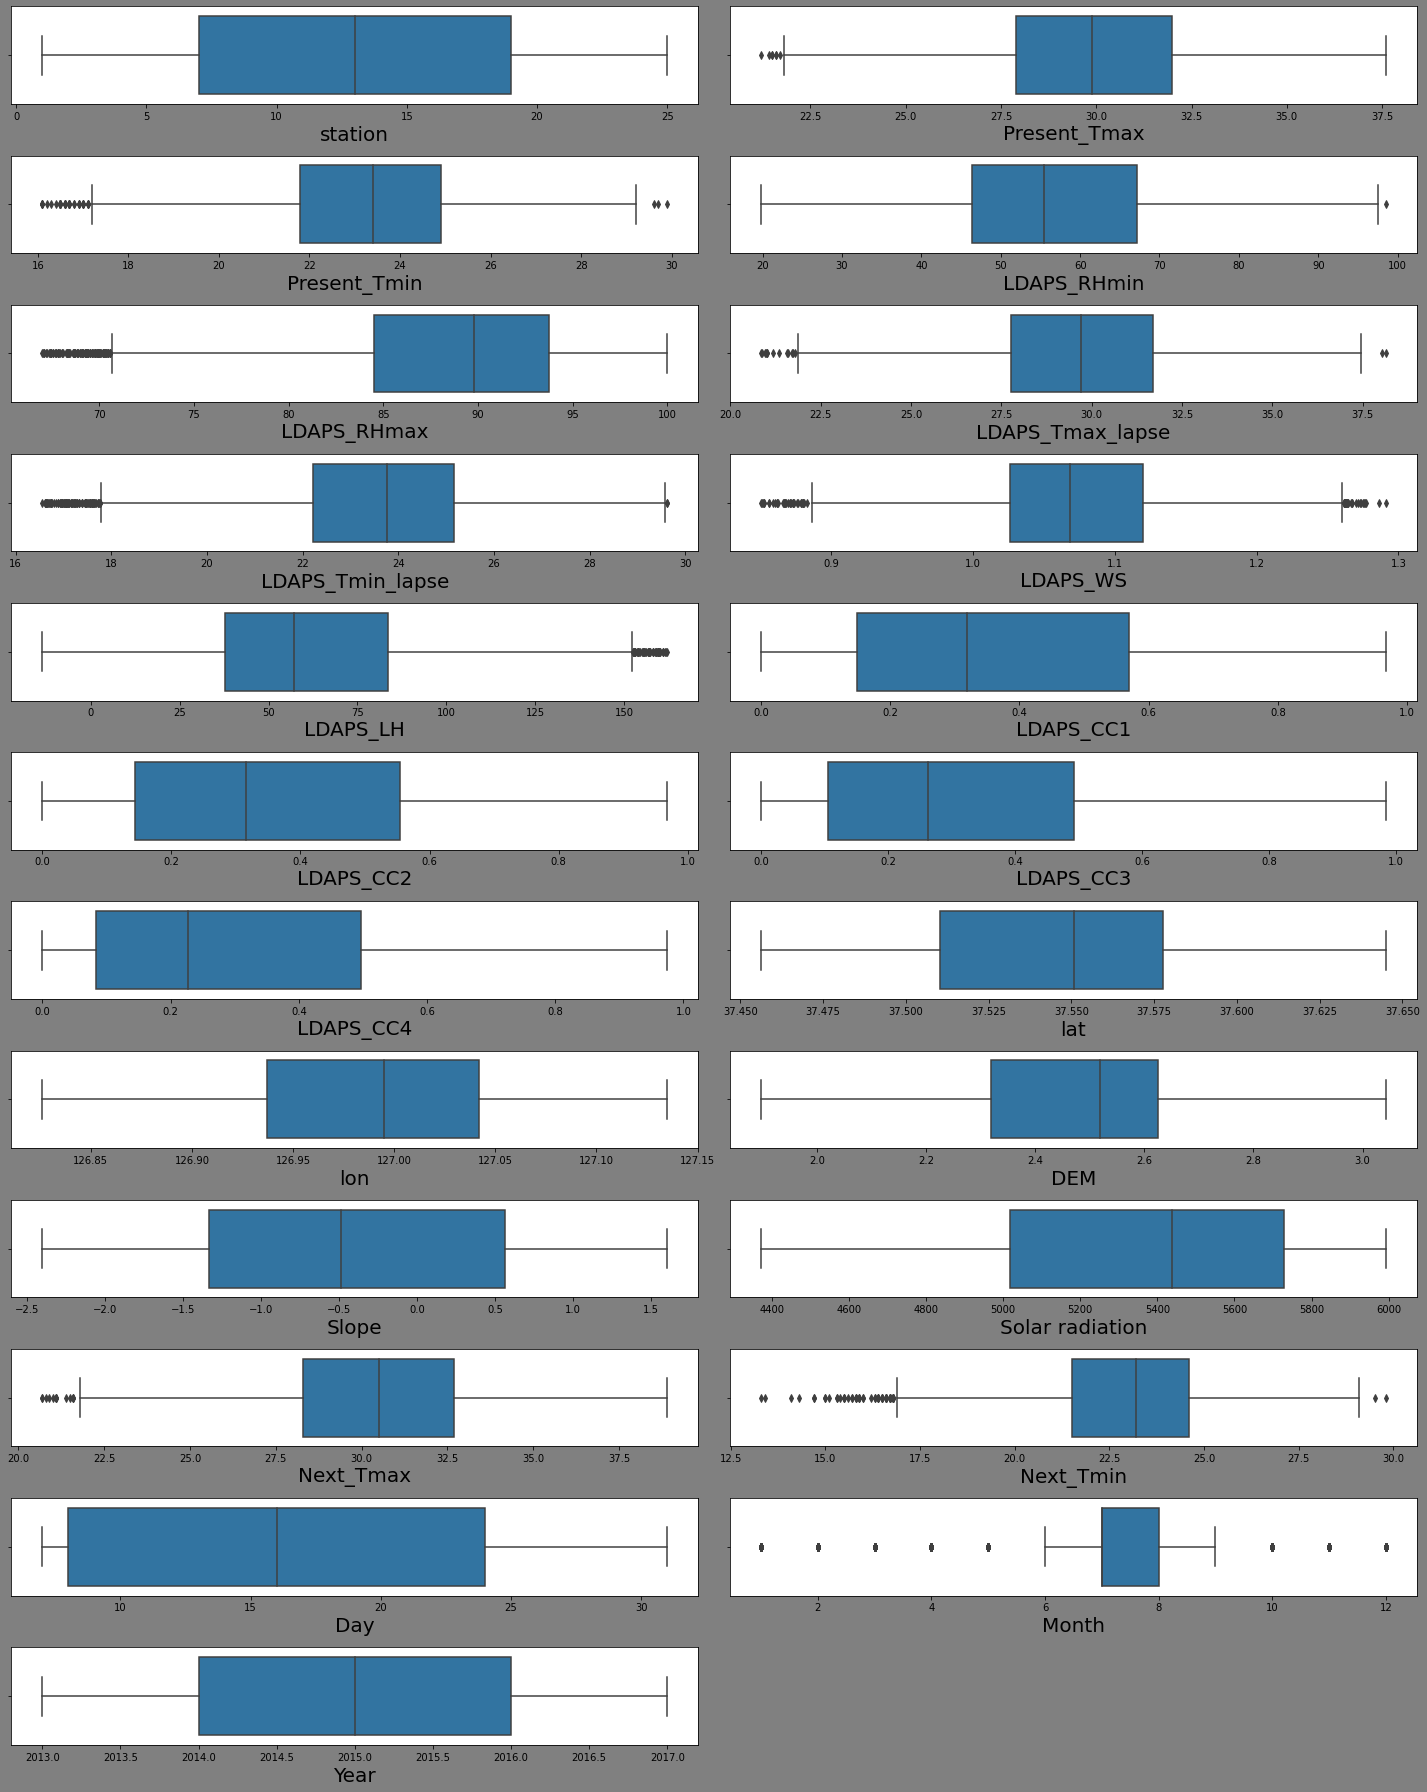

In [32]:
#Checking the skewness removed or not from columns

plt.figure(figsize=(20,25),facecolor="grey")
plotnumber=1

for column in new_df:
    if plotnumber<=23:
        ax=plt.subplot(12,2,plotnumber)
        sns.boxplot(new_df[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

will use to check with values which we got with or without applying z-score and we go ahed with that which give us good score

In [33]:
#split target and dependant variable
#For Next_Tmax
y = new_df['Next_Tmax']
x = new_df.drop(columns = ['Next_Tmax'])

In [34]:
print(y.shape)
print(x.shape)

(7562,)
(7562, 22)


### Feature Selection 

In [108]:
#Seperate data set into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.3,random_state=0)

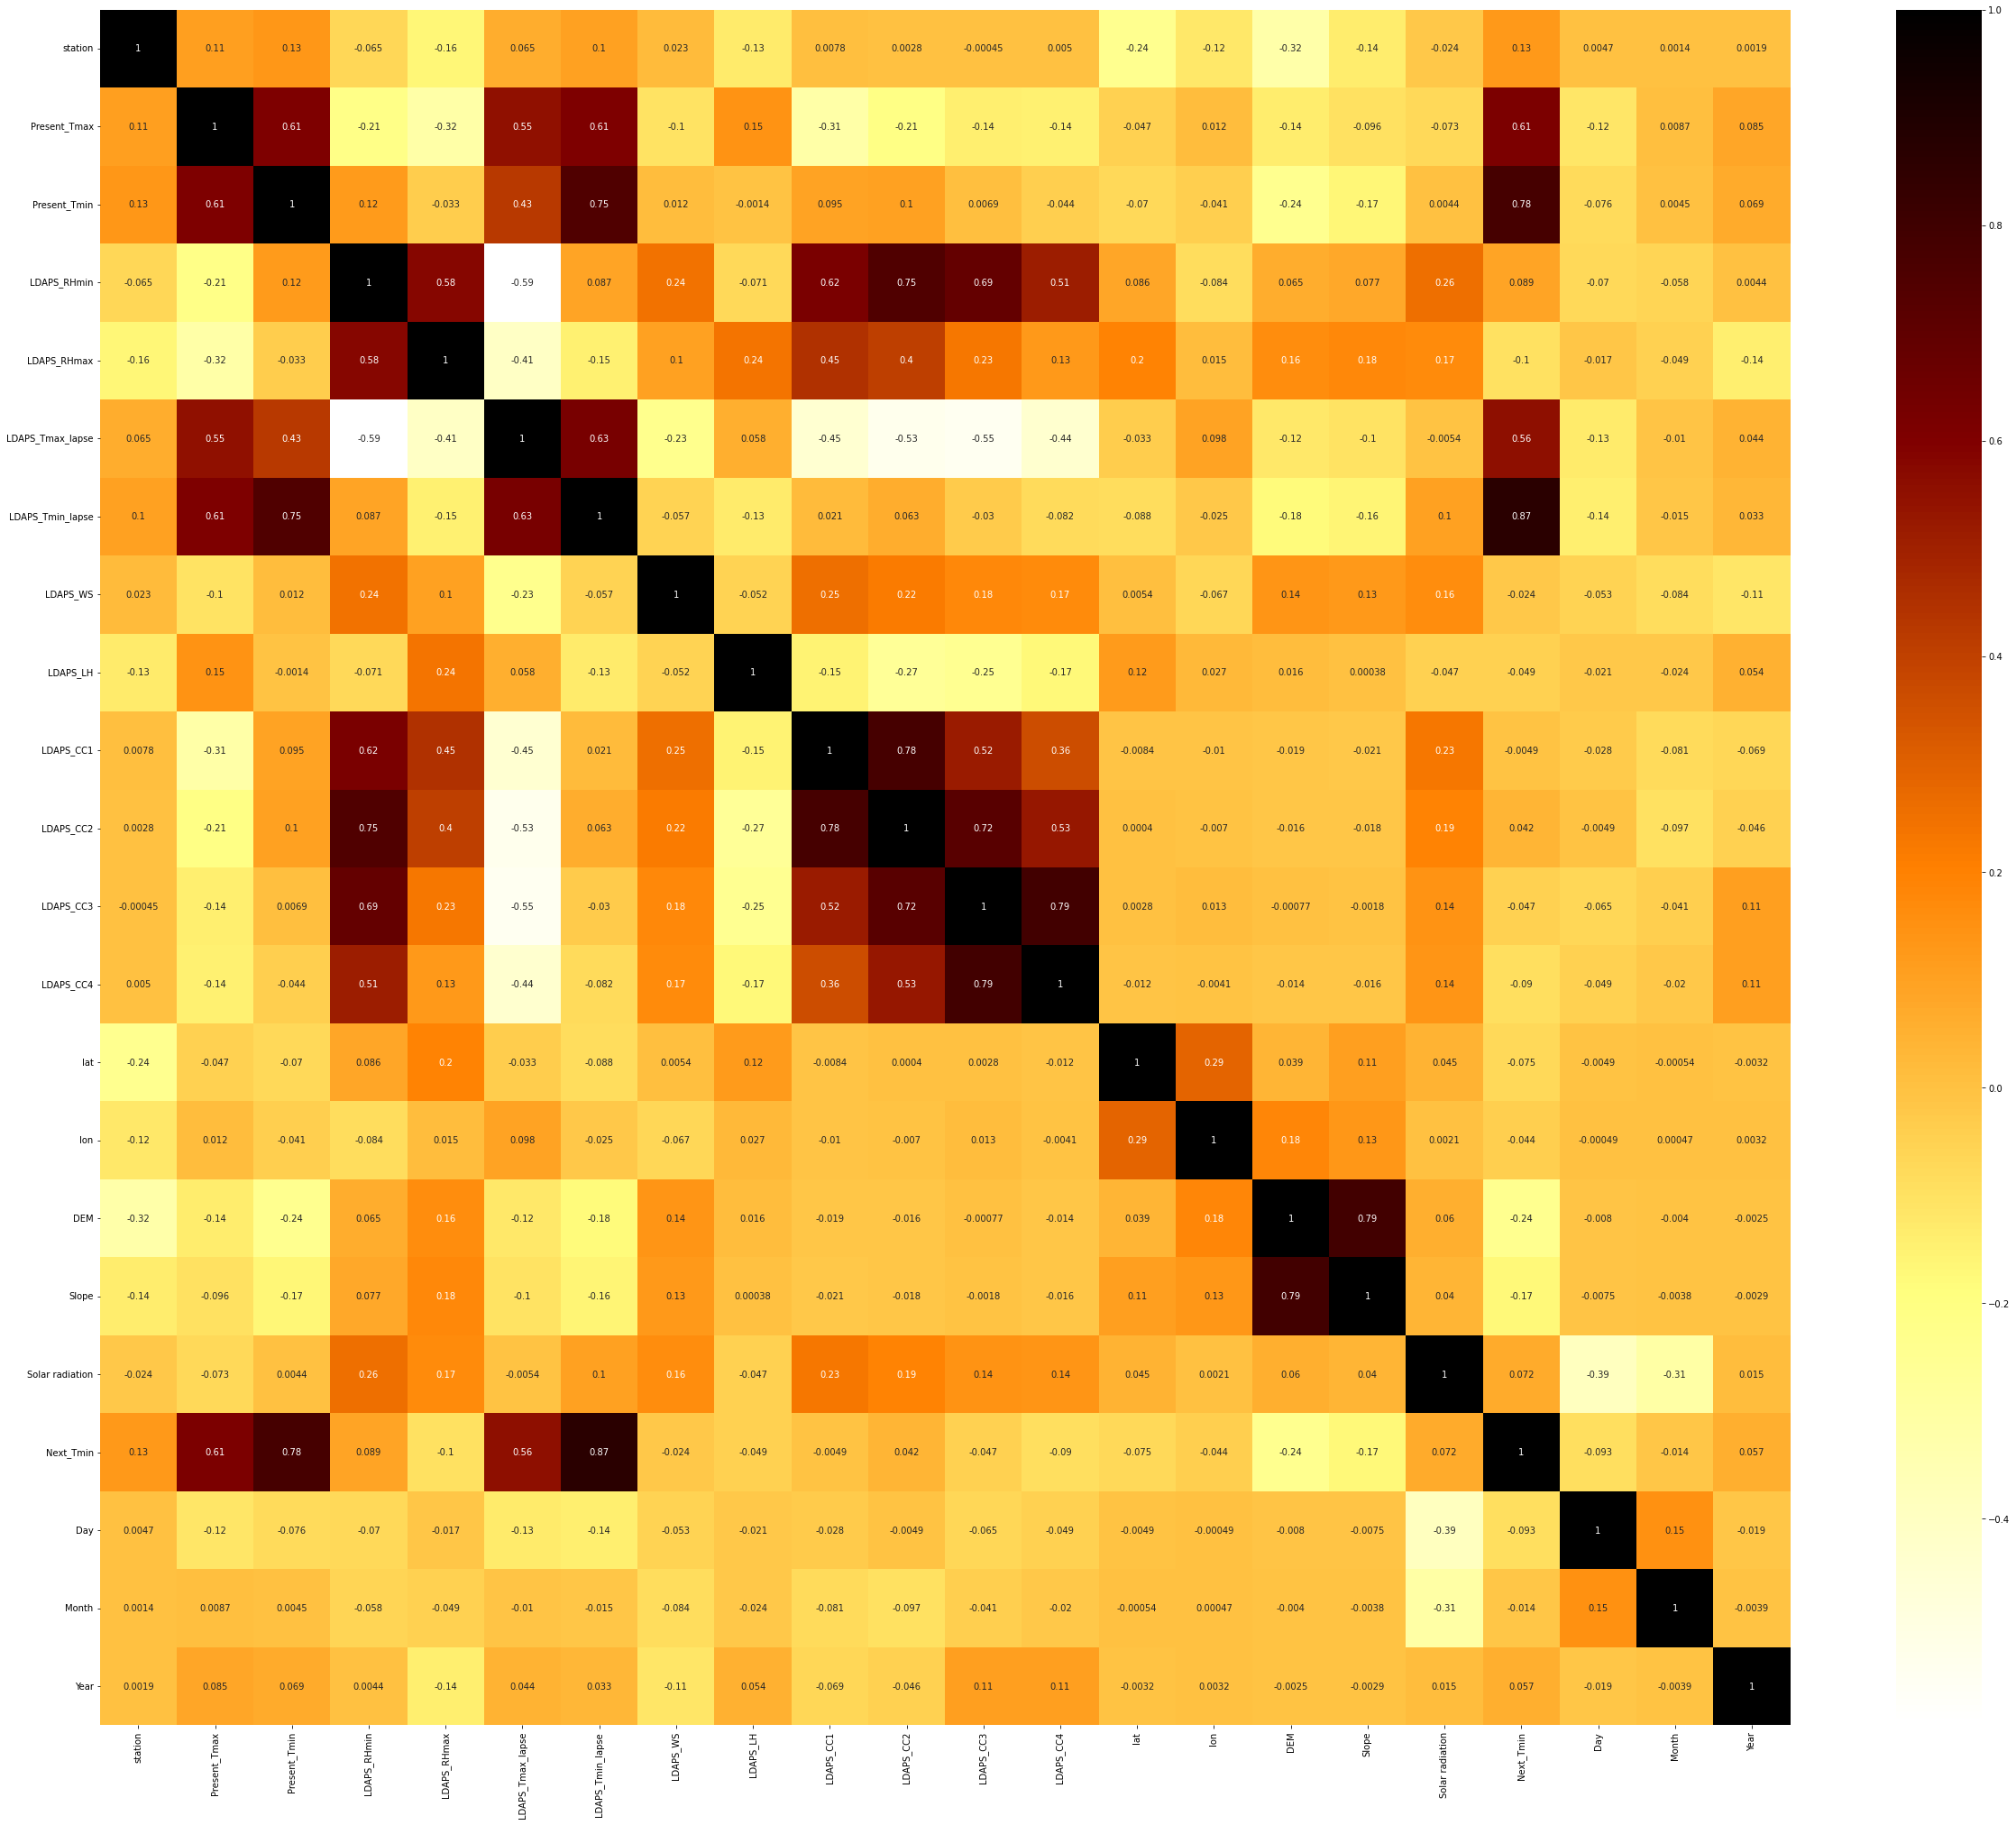

In [109]:
#Using  Person Correlation
plt.figure(figsize=(42,35))
cor=x.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.afmhot_r)
plt.show()

#### Feature Selection 

In [110]:
#with help of following function we can select highly correlated features
#it will remoce the feature that is highlt correlated with any other feature

def correlation(dataset,threshold):
    col_corr=set() #set of all correlated columns
    corr_matrix = x.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_name=corr_matrix.columns[i]#getting name of column
                col_corr.add(col_name)
    return col_corr

In [111]:
corr_feature = correlation(x,0.75)
len(set(corr_feature))

4

In [112]:
corr_feature

{'LDAPS_CC2', 'LDAPS_CC4', 'Next_Tmin', 'Slope'}

In [113]:
x_drop=x.drop(corr_feature,axis = 1)
print("After removing correlated feature",x_drop.shape)

After removing correlated feature (7562, 18)


In [114]:
x_drop.shape

(7562, 18)

In [115]:
#Scaling of independant variable
minmax=MinMaxScaler()
x_scaled = minmax.fit_transform(x)

In [116]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2)

In [117]:
x_scaled.shape

(7562, 22)

Correlated fetures has been removed also data has been scaled

In [118]:
#by using all available 22 features
dt=DecisionTreeRegressor()
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.19,random_state=869)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
R2score = r2_score(y_test,y_pred)
print(R2score)

0.8066938653974633


In [120]:
#by using all available 22 features
rf=RandomForestRegressor()
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.18,random_state=220)
rf.fit(x_train,y_train)
y_pred = rf .predict(x_test)
R2score = r2_score(y_test,y_pred)
print(R2score*100)

90.26227470864295


Text(0, 0.5, 'predect')

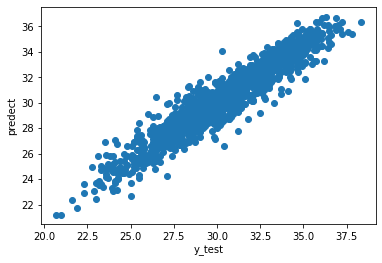

In [121]:
#Diff. between actual and pred. value
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('y_test')
plt.ylabel('predect')

In [122]:
predictions = rf.predict(x_test)

<AxesSubplot:xlabel='Next_Tmax', ylabel='Density'>

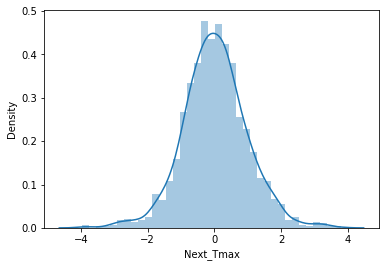

In [123]:
sns.distplot(y_test-predictions)

### Hyperparameter Tuning

In [124]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20)

In [126]:
###Hyper Parameters

#no. of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100, stop=1500, num=100)]

In [127]:
#Randamized Search CV

#no. of features to consider at every split
max_features = ['auto','sqrt']

#max. no. of levels in tree
max_depth = [int(x) for x in np.linspace(start=5, stop=30, num = 8)]

#max no. of samples required to split node
min_samples_split = [2, 4 ,8 ,24,52,63,100]

#mIn.no . of samples that required at each leaf node
min_samples_leaf = [2,5,4,6,3,8,12,10]

In [53]:
# parameters = {'n_estimators' : n_estimators,'max_depth':max_depth,
#     'min_samples_split': min_samples_split,'min_samples_leaf':min_samples_leaf,'max_features':max_features}
# rf =RandomForestRegressor()
# rf_mod = GridSearchCV(rf,parameters)
# rf_mod.fit(x_train,y_train)

In [128]:
rf=RandomForestRegressor()

In [129]:
#create the random grid

random_grid = {'n_estimators' : n_estimators,'max_depth':max_depth,
    'min_samples_split': min_samples_split,'min_samples_leaf':min_samples_leaf,'max_features':max_features}
print(random_grid)

{'n_estimators': [100, 114, 128, 142, 156, 170, 184, 198, 213, 227, 241, 255, 269, 283, 297, 312, 326, 340, 354, 368, 382, 396, 411, 425, 439, 453, 467, 481, 495, 510, 524, 538, 552, 566, 580, 594, 609, 623, 637, 651, 665, 679, 693, 708, 722, 736, 750, 764, 778, 792, 807, 821, 835, 849, 863, 877, 891, 906, 920, 934, 948, 962, 976, 990, 1005, 1019, 1033, 1047, 1061, 1075, 1089, 1104, 1118, 1132, 1146, 1160, 1174, 1188, 1203, 1217, 1231, 1245, 1259, 1273, 1287, 1302, 1316, 1330, 1344, 1358, 1372, 1386, 1401, 1415, 1429, 1443, 1457, 1471, 1485, 1500], 'max_depth': [5, 8, 12, 15, 19, 22, 26, 30], 'min_samples_split': [2, 4, 8, 24, 52, 63, 100], 'min_samples_leaf': [2, 5, 4, 6, 3, 8, 12, 10], 'max_features': ['auto', 'sqrt']}


In [130]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=6,
                               verbose=2, random_state=24, n_jobs=1)

In [131]:
rf_random.fit(x_train,y_train)

Fitting 6 folds for each of 10 candidates, totalling 60 fits
[CV] n_estimators=1500, min_samples_split=4, min_samples_leaf=5, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1500, min_samples_split=4, min_samples_leaf=5, max_features=auto, max_depth=5, total= 1.1min
[CV] n_estimators=1500, min_samples_split=4, min_samples_leaf=5, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV]  n_estimators=1500, min_samples_split=4, min_samples_leaf=5, max_features=auto, max_depth=5, total= 1.1min
[CV] n_estimators=1500, min_samples_split=4, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=1500, min_samples_split=4, min_samples_leaf=5, max_features=auto, max_depth=5, total= 1.1min
[CV] n_estimators=1500, min_samples_split=4, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=1500, min_samples_split=4, min_samples_leaf=5, max_features=auto, max_depth=5, total= 1.1min
[CV] n_estimators=1500, min_samples_split=4, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=1500, min_samples_split=4, min_samples_leaf=5, max_features=auto, max_depth=5, total= 1.1min
[CV] n_estimators=1500, min_samples_split=4, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=1500, min_samples_split=4, min_samples_leaf=5, max_features=auto, max_depth=5, total= 1.1min
[CV] n_estimators=1005, min_samples_split=8, min_sam

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 37.8min finished


RandomizedSearchCV(cv=6, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [132]:
predictions = rf_random.predict(x_test)

In [133]:
print(r2_score(y_train,rf_random.predict(x_train)))
print(r2_score(y_test,predictions))

0.9796920614988366
0.9132476858380831


In [134]:
print(rf_random.score(x_test,y_test))

-0.8089660826154729


Observation :- 
    Our model after Hyperparameter tuning able to lerned 97.69% data
    From which he able to actual understand 91.32%

In [135]:
#after using parameters which we got in RFCV
print(r2_score(y_test,predictions))

0.9132476858380831


<AxesSubplot:xlabel='Next_Tmax', ylabel='Density'>

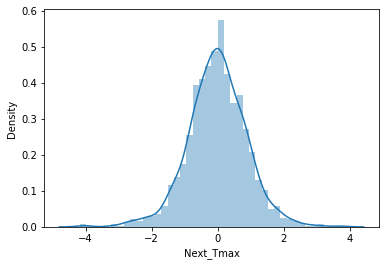

In [136]:
sns.distplot(y_test-predictions)

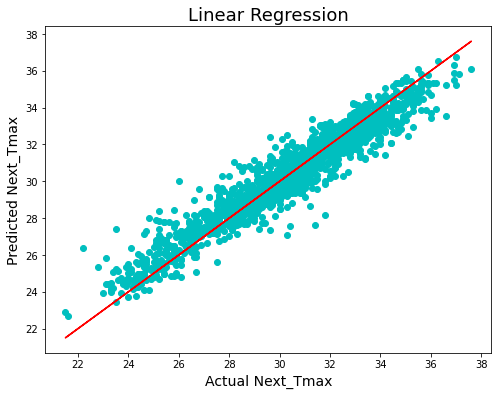

In [137]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predictions,color='c')
plt.plot(y_test,y_test,color='r')
plt.xlabel('Actual Next_Tmax',fontsize=14)
plt.ylabel('Predicted Next_Tmax',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

##### Predicted model Almost 91% accuretly following the actual path. 

Model r2 score which we are getting 91% which shows that the model is performing well.
by using all available features we are getting good results ,so we are Continue  with same 

In [179]:
#Saving the model
import pickle
filename = open('nxt_day_max_temp.pkl','wb')
pickle.dump(rf_random,filename)

### Conclusion :

In [180]:
loaded_model = pickle.load(open('nxt_day_max_temp.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

-0.8089660826154729


In [181]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["predicted","original"])

In [182]:
print(x_test.shape)
print(predictions.shape)

(1513, 22)
(1513,)


In [183]:
with pd.option_context("display.max_columns",1513):display(conclusion)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

### Model for predicting Next_Tmin

In [158]:
#split target and dependant variable
#For Next_Tmin
y2 = new_df['Next_Tmin']
x1 = new_df.drop(columns = ['Next_Tmin'])

In [159]:
#Scaling of independant variable
minmax=MinMaxScaler()
x_scaled_1= minmax.fit_transform(x1)

### Hyperparameter Tuning

In [160]:
###Hyper Parameters

#no. of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100, stop=1500, num=10)]

In [161]:
#Randamized Search CV

#no. of features to consider at every split
max_features = ['auto','sqrt']

#max. no. of levels in tree
max_depth = [int(x) for x in np.linspace(start=5, stop=30, num = 8)]

#max no. of samples required to split node
min_samples_split = [2, 4 ,8 ,24,52,63,100]

#mIn.no . of samples that required at each leaf node
min_samples_leaf = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

In [162]:
#create the random grid

random_grid = {'n_estimators' : n_estimators,'max_depth':max_depth,
    'min_samples_split': min_samples_split,'min_samples_leaf':min_samples_leaf,'max_features':max_features}
print(random_grid)

{'n_estimators': [100, 255, 411, 566, 722, 877, 1033, 1188, 1344, 1500], 'max_depth': [5, 8, 12, 15, 19, 22, 26, 30], 'min_samples_split': [2, 4, 8, 24, 52, 63, 100], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'max_features': ['auto', 'sqrt']}


In [163]:
#Using Rndom grid to search for best Hyperparameters
#creating base model to tune
rf=RandomForestRegressor()

In [164]:
rf_random_2 = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=6,
                               verbose=2, random_state=24, n_jobs=1)

In [165]:
rf_random_2.fit(x_train,y_train)

Fitting 6 folds for each of 10 candidates, totalling 60 fits
[CV] n_estimators=1033, min_samples_split=24, min_samples_leaf=2, max_features=auto, max_depth=26 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1033, min_samples_split=24, min_samples_leaf=2, max_features=auto, max_depth=26, total= 1.5min
[CV] n_estimators=1033, min_samples_split=24, min_samples_leaf=2, max_features=auto, max_depth=26 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s


[CV]  n_estimators=1033, min_samples_split=24, min_samples_leaf=2, max_features=auto, max_depth=26, total= 1.6min
[CV] n_estimators=1033, min_samples_split=24, min_samples_leaf=2, max_features=auto, max_depth=26 
[CV]  n_estimators=1033, min_samples_split=24, min_samples_leaf=2, max_features=auto, max_depth=26, total= 1.5min
[CV] n_estimators=1033, min_samples_split=24, min_samples_leaf=2, max_features=auto, max_depth=26 
[CV]  n_estimators=1033, min_samples_split=24, min_samples_leaf=2, max_features=auto, max_depth=26, total= 1.6min
[CV] n_estimators=1033, min_samples_split=24, min_samples_leaf=2, max_features=auto, max_depth=26 
[CV]  n_estimators=1033, min_samples_split=24, min_samples_leaf=2, max_features=auto, max_depth=26, total= 1.6min
[CV] n_estimators=1033, min_samples_split=24, min_samples_leaf=2, max_features=auto, max_depth=26 
[CV]  n_estimators=1033, min_samples_split=24, min_samples_leaf=2, max_features=auto, max_depth=26, total= 1.5min
[CV] n_estimators=1500, min_sample

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 24.8min finished


RandomizedSearchCV(cv=6, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [168]:
predictions_2 = rf_random_2.predict(x_test)

In [169]:
print(r2_score(y_train,rf_random_2.predict(x_train)))
print(r2_score(y_test,predictions_2))

0.9710740169967988
0.9096594738617582


In [171]:
#after using parameters which we got in RFCV
print(r2_score(y_test,predictions_2))

0.9096594738617582


In [172]:
predictions_2 = rf_random_2.predict(x_test)

<AxesSubplot:xlabel='Next_Tmax', ylabel='Density'>

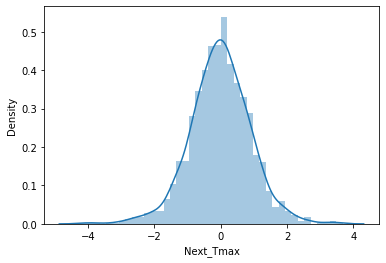

In [173]:
sns.distplot(y_test-predictions_2)

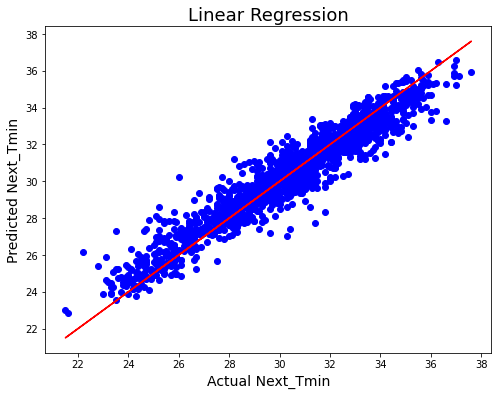

In [174]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predictions_2,color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel('Actual Next_Tmin',fontsize=14)
plt.ylabel('Predicted Next_Tmin',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [175]:
#Saving the model
import pickle
file = 'min_temp.pkl'
pickle.dump(rf_random_2,open(file,'wb'))

### Conclusion :

In [176]:
loaded_model = pickle.load(open('min_temp.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

-0.8424261904422653


In [177]:
conclusion_1 = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["predicted","original"])

In [178]:
with pd.option_context("display.max_columns",1512):display(conclusion_1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,...,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021